<a href="https://colab.research.google.com/github/chaeeuen/python-machine-learing/blob/main/0920_%ED%86%B5%ED%94%84%EC%88%98%EC%97%85%EB%82%B4%EC%9A%A9(%EB%8B%B5%EC%95%88%ED%8F%AC%ED%95%A8)_Notebook_Pytorch_Derivative_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2. Pytorch

## Derivative


# 3. Derivatives

## 3.1. Derivatives

Determine the derivative of

$ y = 2x^3+x $   

at   $x=1$.


In [6]:
import torch
x = torch.tensor(1., requires_grad=True) #every operation on them should be tracked

y = 2 * x ** 3 + x

y.backward() # calculate derivatives and stores them in the respective tensors' .grad

x.grad

tensor(7.)

$ \frac{dy(x)}{dx} = 6x^{2} + 1$  

$ \frac{dy(x=1)}{dx} = 6*1^{2} + 1$

In [7]:
x = torch.tensor(1., requires_grad=True) #every operation on them should be tracked
y = 2 * x ** 3 + x
z = torch.exp(y)
z.backward()
x.grad

tensor(140.5988)

In [8]:
print(x)
print('data:',x.data)
print('grad:',x.grad)



tensor(1., requires_grad=True)
data: tensor(1.)
grad: tensor(140.5988)


In [9]:
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

is_leaf: True
requires_grad: True


In [10]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)


data: tensor(3.)
grad_fn: <AddBackward0 object at 0x7f67a4305e40>
grad: None


<ipython-input-10-6ed5a3c44434>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print('grad:',y.grad)


In [11]:
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

is_leaf: False
requires_grad: True


### 2-4. Partial Derivates

#### 참고  
* `requires_grads=True`인 tensor는 tensor를 바로 .numpy() 로 변환 불가능  
* `.detach().numpy()` 로 변환 가능

Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [12]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

# Type the code here
u = torch.tensor(2., requires_grad=True)
v = torch.tensor(1., requires_grad=True)
y = u*v + (u*v)**2

y.backward()
print(u.grad, v.grad)

tensor(5.) tensor(10.)


### Exercise 2:
You are given

$y=\exp(2x_1)+x_2^2$.

Calculate $\triangledown y = \left( \frac{\delta y}{\delta x_1},
\frac{\delta y}{\delta x_2} \right)$ at $x_1=1.0$ and $x_2=2.0$.

In [13]:
x = torch.tensor([1.0, 2.0], requires_grad=True, dtype=torch.float32)
y=torch.exp(2*x[0])+x[1]**2
y.backward()
x.grad

tensor([14.7781,  4.0000])

In [16]:
### See why the following is not working
x = torch.tensor([1.0, 2.0], requires_grad=True, dtype=torch.float32)
y=torch.math.exp(2*x[0])
y.backward()
x.grad

AttributeError: 'float' object has no attribute 'backward'

## 2.5 Chain rules amd gradients



## Example 1:

You are given $f(x_1, x_2)=(x_1+2x_2^3)^2$.

* Calculate grad $f$ at $(x_1, x_2)=(1,2)$.

Here, we are presenting two solutions. What is the difference?

In [17]:
x = torch.tensor([1.0, 2.0], requires_grad=True)
f = (x[0]+2*x[1]**3)**2
f.backward()
x.grad

tensor([ 34., 816.])

In [18]:
x = torch.tensor([[1.0, 2.0]], requires_grad=True)
f = (x[0,0]+2*x[0,1]**3)**2
f.backward()
x.grad

tensor([[ 34., 816.]])

### Example 2:

Let $f(x)=x_1^2+2x_2$ and $g(t)=\begin{pmatrix} \sin(t) \\ \cos(t)\end{pmatrix}.$

In [19]:
import torch
t=torch.tensor([1.0], requires_grad=True)
g=torch.sin(t)**2+2* torch.cos(t)
g.backward()
t.grad

tensor([-0.7736])

In [20]:
import torch
t=torch.tensor([1.0], requires_grad=True)
g=[torch.sin(t), torch.cos(t)]
f=g[0]**2 + 2*g[1]
f.backward()
print(t.grad)

tensor([-0.7736])


## 2.6$^*$ Jacobian (Second derivatives)



In [21]:
import torch
def myftn(x, y):
    return 2 * torch.exp(x) + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(myftn, inputs)

(tensor([0.4900]), tensor([0.6512]))


(tensor([[3.2648]]), tensor([[3.]]))

## HW 1:

You are given $X$ and $Y$. Using the linear regression, you want to have the following model

$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X$

by minimizing the following square loss

$g(\beta_0, \beta_1)=\sum\limits_{i=1}^{20}(y_i-(\beta_0+\beta_1 x_i))^2$.

Answer the following questions.

1. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ without using autograd.

2. Calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd.

3. Reshape $X$ into the shape of $[20,1]$ and name it as $XX$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

4. Stack $X$ and $Y$ to make $MY\_data1$ of shape $[20,2]$. Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

5. Concatenate $X$ and $Y$ to make $MY\_data2$ of shape $[20,2]$. (Use the reshape if necessary) Then, calculate grad $g$ at $(\beta_0, \beta_1)=(1.0, 0.5)$ using autograd. (Caution: your answer should be the same as in 2.)

In [58]:
import torch
import matplotlib.pyplot as plt
import numpy as np

X=torch.tensor([-3.0000e+00, -2.7000e+00, -2.4000e+00, -2.1000e+00, -1.8000e+00,
        -1.5000e+00, -1.2000e+00, -9.0000e-01, -6.0000e-01, -3.0000e-01,
        -2.3842e-08,  3.0000e-01,  6.0000e-01,  9.0000e-01,  1.2000e+00,
         1.5000e+00,  1.8000e+00,  2.1000e+00,  2.4000e+00,  2.7000e+00])

In [59]:
Y = torch.tensor([-7.1452, -5.4253, -5.1977, -3.6225, -3.8022, -4.4101, -4.6622, -3.1932,
        -1.7325, -1.8879, -1.0742, -0.2320,  1.8226,  1.5453, -1.5535,  0.8857,
         1.7537,  3.1607,  1.8912,  4.0895])

# 2. Calculate grad  g  at  (β0,β1)=(1.0,0.5)  using autograd

In [48]:
beta = torch.tensor([1.0,0.5], requires_grad=True)
L = torch.sum(( Y - (beta[0] + beta[1] * X))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

# 3. Reshape  X  into the shape of  [20,1]  and name it as  XX . Then, calculate grad  g  at  (β0,β1)=(1.0,0.5)  using autograd. (Caution: your answer should be the same as in 2.)

In [52]:
XX = X.reshape([-1,1])
XX.shape

torch.Size([20, 1])

In [54]:
beta = torch.tensor([1.0,0.5], requires_grad=True)
XX = X.reshape([-1,1])
L = torch.sum(( Y.reshape([-1,1]) - (beta[0] + beta[1] * XX))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

# 4. Stack  X  and  Y  to make  MY_data1  of shape  [20,2] . Then, calculate grad  g  at  (β0,β1)=(1.0,0.5)  using autograd. (Caution: your answer should be the same as in 2.)

In [63]:
beta = torch.tensor([1.0,0.5], requires_grad=True)
MY_data1 = torch.stack([X,Y], axis=1)

L = torch.sum((MY_data1[:,1:] - (beta[0]+beta[1]*MY_data1[:,:1]))**2 )
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

# 5. Concatenate  X  and  Y  to make  MY_data2  of shape  [20,2] . (Use the reshape if necessary) Then, calculate grad  g  at  (β0,β1)=(1.0,0.5)  using autograd. (Caution: your answer should be the same as in 2.)

In [65]:
ones = torch.ones([20])
X_ = torch.concat([ones,X])
X_.shape ## 원하는게 아니야

torch.Size([40])

In [71]:
BETA = torch.tensor([[1.0],
                     [0.5]], requires_grad=True)
ones = torch.ones([20])
X_ = torch.stack([ones, X], axis = 1)
L = torch.sum((Y.reshape([-1,1])-X_ @ BETA)**2) #Y를_reshape안하고_돌리면_오류남
L.backward()
BETA.grad

tensor([[  94.5796],
        [-159.6058]])

In [76]:
beta = torch.tensor([1.0, 0.5], requires_grad=True)
ones = torch.ones([20])
X_ = torch.stack([ones, X], axis = 1)
L = torch.sum((Y.reshape([-1,1])-X_ @ beta.reshape([2,1]))**2)
L.backward()
beta.grad

tensor([  94.5796, -159.6058])

## HW 2:

You are given

$f(x)=x^3-3x^2+4$

Answer the following questions.

1. Draw the graph of $(x,f(x))$ for $x\in [-5, 5]$.
2. Draw the graph of $(x,f^{\prime}(x))$ for $x\in [-5, 5]$ using augograd in torch.




# 1. Draw the graph of  (x,f(x))  for  x∈[−5,5] .

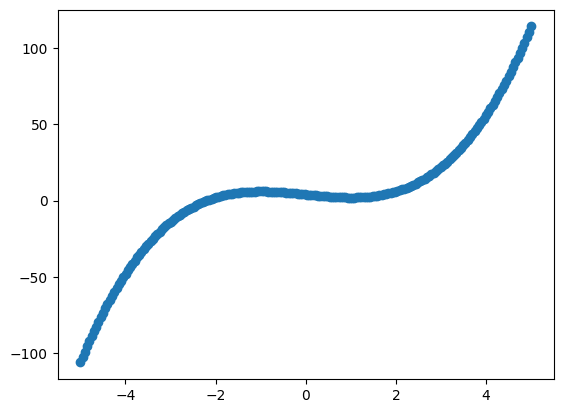

In [80]:
import matplotlib.pyplot as plt
X = np.linspace(-5,5,num=200)
Y = X**3 - 3*X +4
plt.scatter(X,Y)

# 2. Draw the graph of  (x,f′(x))  for  x∈[−5,5]  using augograd in torch.

In [88]:
import matplotlib.pyplot as plt
x_value= np.linspace(-5,5,num=200)
dy_dx = []

for i in range(200):
  x = torch.tensor(x_value[i], requires_grad=True)
  y = x**3 - 3*x**2 + 4
  y.backward()

  derivative = x.grad
  dy_dx.append(derivative.detach().numpy())
  #0R:y_dx.append(derivative.item())

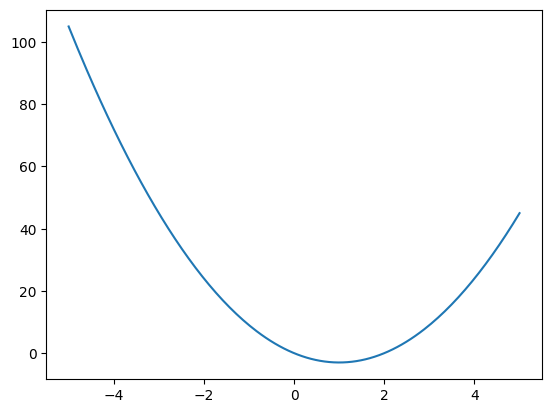

In [86]:
plt.plot(x_value,np.array(dy_dx))

In [83]:
dy_dx

[tensor(105., dtype=torch.float64),
 tensor(103.1985, dtype=torch.float64),
 tensor(101.4122, dtype=torch.float64),
 tensor(99.6410, dtype=torch.float64),
 tensor(97.8850, dtype=torch.float64),
 tensor(96.1442, dtype=torch.float64),
 tensor(94.4184, dtype=torch.float64),
 tensor(92.7079, dtype=torch.float64),
 tensor(91.0125, dtype=torch.float64),
 tensor(89.3322, dtype=torch.float64),
 tensor(87.6671, dtype=torch.float64),
 tensor(86.0171, dtype=torch.float64),
 tensor(84.3823, dtype=torch.float64),
 tensor(82.7627, dtype=torch.float64),
 tensor(81.1582, dtype=torch.float64),
 tensor(79.5688, dtype=torch.float64),
 tensor(77.9946, dtype=torch.float64),
 tensor(76.4356, dtype=torch.float64),
 tensor(74.8917, dtype=torch.float64),
 tensor(73.3629, dtype=torch.float64),
 tensor(71.8493, dtype=torch.float64),
 tensor(70.3509, dtype=torch.float64),
 tensor(68.8676, dtype=torch.float64),
 tensor(67.3994, dtype=torch.float64),
 tensor(65.9464, dtype=torch.float64),
 tensor(64.5086, dtype=tor